In [927]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [928]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [929]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [930]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561559 entries, 0 to 1561558
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1561559 non-null  int64  
 1   kWh       1561559 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.8 MB


In [931]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1561554    0.22
1561555    0.22
1561556    0.21
1561557    0.21
1561558    0.21
Name: kWh, Length: 1561559, dtype: float64

In [932]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1561554    0.22
1561555    0.22
1561556    0.21
1561557    0.21
1561558    0.21
Name: kWh, Length: 1561559, dtype: float64

In [933]:
l=len(conso_data)-1
l

1561558

In [934]:
conso_data['sec']=conso_data['Interval']/1000


In [935]:
conso_data['Wh']=3600000/conso_data['Interval']


In [936]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [937]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561559 entries, 0 to 1561558
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1561559 non-null  int64  
 1   kWh        1561559 non-null  float64
 2   sec        1561559 non-null  float64
 3   Wh         1561559 non-null  float64
 4   cumul(ms)  1561559 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 59.6 MB


In [938]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1561554,16516,0.22,16.516,217.970453,38668562398
1561555,16557,0.22,16.557,217.430694,38668578955
1561556,16772,0.21,16.772,214.643453,38668595727
1561557,16786,0.21,16.786,214.464435,38668612513
1561558,16780,0.21,16.780,214.541120,38668629293


In [939]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38668629293000

In [940]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 51, 56, 9322)

In [941]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [942]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [943]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [944]:
conso_data['dates']

0         2023-08-21 18:52:17.943322
1         2023-08-21 18:52:39.801322
2         2023-08-21 18:53:01.802322
3         2023-08-21 18:53:23.730322
4         2023-08-21 18:53:45.621322
                     ...            
1561554   2024-11-11 08:07:58.407322
1561555   2024-11-11 08:08:14.964322
1561556   2024-11-11 08:08:31.736322
1561557   2024-11-11 08:08:48.522322
1561558   2024-11-11 08:09:05.302322
Name: dates, Length: 1561559, dtype: datetime64[ns]

## créer les dates

In [945]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:52:17.943322,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:52:39.801322,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:53:01.802322,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:53:23.730322,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:53:45.621322,21/08/23
...,...,...,...,...,...,...,...
1561554,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24
1561555,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24
1561556,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24
1561557,16786,0.21,16.786,214.464435,38668612513,2024-11-11 08:08:48.522322,11/11/24


### save conso_data with dates

In [946]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [947]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('11/11/24', 11, 11, 2024)

In [948]:
here = now.strftime('%H:%M:%S')
here

'08:09:36'

In [949]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [950]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 1560581 to 1561558
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   978 non-null    int64         
 1   kWh        978 non-null    float64       
 2   sec        978 non-null    float64       
 3   Wh         978 non-null    float64       
 4   cumul(ms)  978 non-null    int64         
 5   dates      978 non-null    datetime64[ns]
 6   days       978 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 61.1+ KB


In [951]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [952]:
data = list(df_grp['kWh'])
print(data)

[0.861, 3.7, 4.23, 3.686, 4.195, 4.625, 3.503, 3.401, 3.53, 3.684, 3.808, 3.75, 4.257, 3.833, 3.44, 3.636, 3.325, 3.44, 4.244, 4.0, 4.053, 3.916, 3.436, 4.474, 3.715, 3.77, 4.425, 4.667, 3.761, 3.219, 3.175, 4.027, 3.649, 3.179, 3.795, 4.173, 3.739, 3.561, 4.797, 4.176, 4.544, 3.772, 3.394, 4.312, 3.878, 3.873, 3.435, 4.075, 3.652, 3.404, 4.12, 3.391, 3.89, 3.833, 3.645, 3.751, 4.244, 3.29, 3.874, 2.967, 2.057, 2.045, 2.463, 4.09, 3.736, 4.324, 3.631, 3.9, 3.75, 3.942, 3.956, 4.128, 3.63, 3.171, 3.796, 3.551, 3.591, 3.7, 3.689, 3.236, 3.908, 3.261, 3.749, 3.592, 4.092, 3.607, 3.338, 3.825, 4.062, 4.385, 4.081, 3.999, 4.221, 3.75, 3.925, 3.873, 3.911, 3.75, 4.041, 4.338, 3.885, 3.521, 3.668, 3.674, 3.337, 3.853, 3.989, 4.109, 3.474, 4.175, 3.606, 4.108, 4.511, 3.685, 3.421, 3.581, 4.184, 3.669, 4.08, 3.981, 3.748, 3.588, 5.134, 3.7, 3.759, 4.305, 4.089, 4.76, 4.392, 3.96, 3.792, 4.363, 4.66, 4.22, 4.78, 4.341, 3.684, 4.219, 3.688, 3.626, 3.523, 3.961, 3.652, 3.788, 3.588, 3.492, 3.926, 

In [953]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [954]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [955]:
df = conso_data
len(df)

1561559

In [956]:
period(p=2)

2023-08-22 00:58:31.746322	2023-08-22 08:02:47.366322	7h 4m 15s 	2000


In [957]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291959
dtype: float64

In [958]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.47786
dtype: float64

In [959]:
last=df_grp.iloc[-1]['kWh']
last

0.978

In [960]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 1560581 to 1561558
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   978 non-null    int64         
 1   kWh        978 non-null    float64       
 2   sec        978 non-null    float64       
 3   Wh         978 non-null    float64       
 4   cumul(ms)  978 non-null    int64         
 5   dates      978 non-null    datetime64[ns]
 6   days       978 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 61.1+ KB


In [961]:
# select day
day = today
#day = '16/08/24'


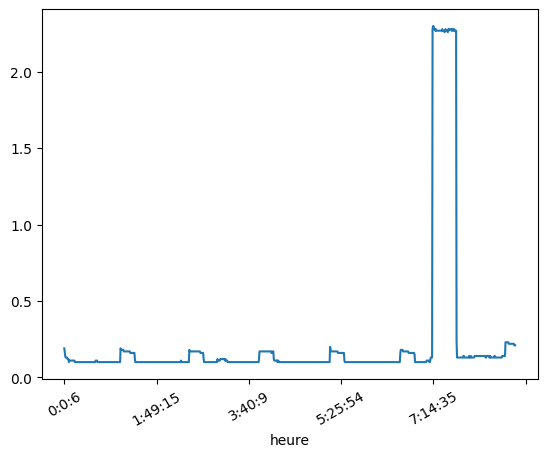

In [962]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [963]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:52:17.943322,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:52:39.801322,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:53:01.802322,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:53:23.730322,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:53:45.621322,21/08/23
...,...,...,...,...,...,...,...
1561554,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24
1561555,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24
1561556,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24
1561557,16786,0.21,16.786,214.464435,38668612513,2024-11-11 08:08:48.522322,11/11/24


In [964]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:6,19394,0.19,19.394,185.624420,38639290235,2024-11-11 00:00:06.244322,11/11/24
0:0:27,21201,0.17,21.201,169.803311,38639311436,2024-11-11 00:00:27.445322,11/11/24
0:0:53,26520,0.14,26.520,135.746606,38639337956,2024-11-11 00:00:53.965322,11/11/24
0:1:20,26986,0.13,26.986,133.402505,38639364942,2024-11-11 00:01:20.951322,11/11/24
0:1:48,27523,0.13,27.523,130.799695,38639392465,2024-11-11 00:01:48.474322,11/11/24
...,...,...,...,...,...,...,...
8:7:58,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24
8:8:14,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24
8:8:31,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24


In [965]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 13/10/24 1.786


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1560581,19394,0.19,19.394,185.624420,38639290235,2024-11-11 00:00:06.244322,11/11/24,0:0:6
1560582,21201,0.17,21.201,169.803311,38639311436,2024-11-11 00:00:27.445322,11/11/24,0:0:27
1560583,26520,0.14,26.520,135.746606,38639337956,2024-11-11 00:00:53.965322,11/11/24,0:0:53
1560584,26986,0.13,26.986,133.402505,38639364942,2024-11-11 00:01:20.951322,11/11/24,0:1:20
1560585,27523,0.13,27.523,130.799695,38639392465,2024-11-11 00:01:48.474322,11/11/24,0:1:48
...,...,...,...,...,...,...,...,...
1561554,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24,8:7:58
1561555,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24,8:8:14
1561556,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24,8:8:31
1561557,16786,0.21,16.786,214.464435,38668612513,2024-11-11 08:08:48.522322,11/11/24,8:8:48


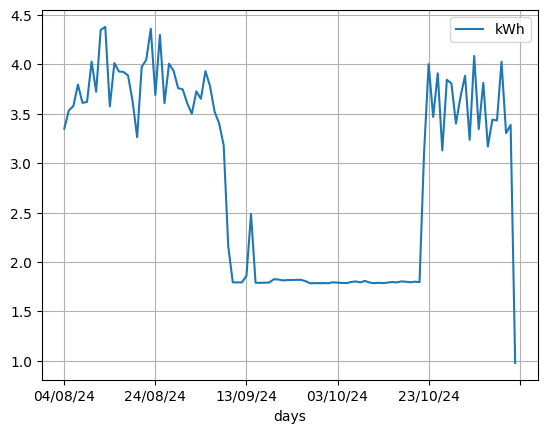

In [966]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-11 00:00:06.244322	2024-11-11 08:09:05.302322	8h 8m 59s 	978
<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 1560581 to 1561558
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   978 non-null    int64         
 1   kWh        978 non-null    float64       
 2   sec        978 non-null    float64       
 3   Wh         978 non-null    float64       
 4   cumul(ms)  978 non-null    int64         
 5   dates      978 non-null    datetime64[ns]
 6   days       978 non-null    object        
 7   heure      978 non-null    object        
 8   hours      978 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 76.4+ KB


('11/11/24', <Axes: xlabel='hours'>)

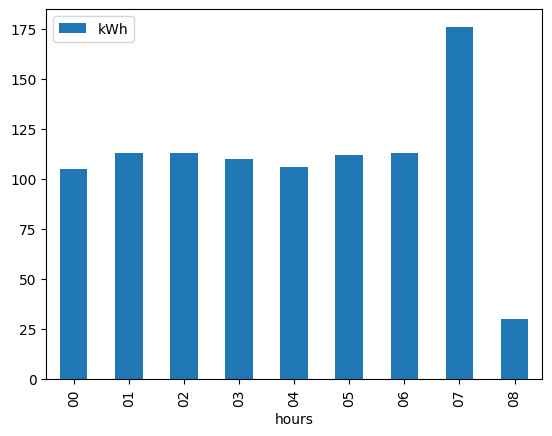

In [967]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [968]:
df_grp

,kWh
days,
21/08/23,0.861
22/08/23,3.700
23/08/23,4.230
24/08/23,3.686
25/08/23,4.195
...,...
07/11/24,3.432
08/11/24,4.027
09/11/24,3.304


In [969]:
# select number of days to display
span = 30
#df_grp.tail(span)


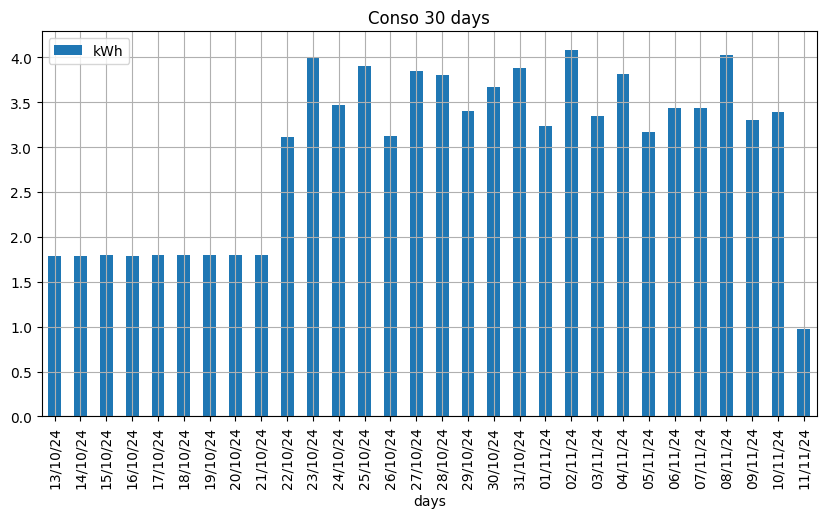

In [970]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


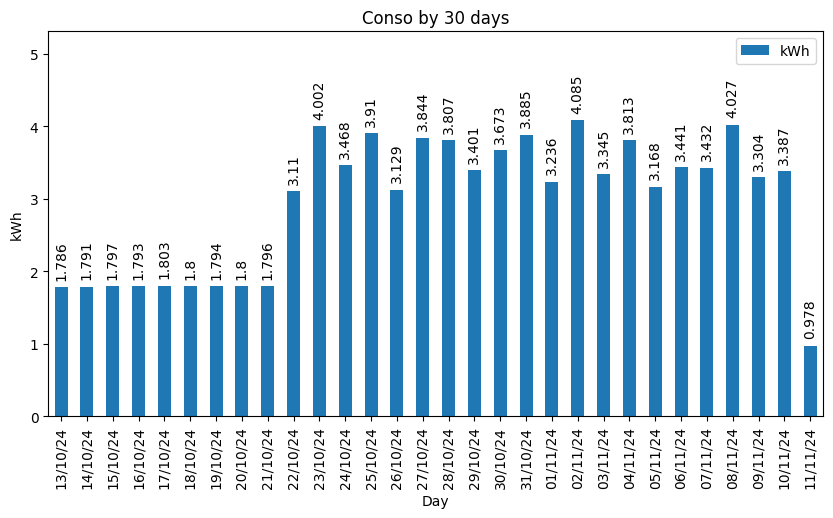

In [971]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [972]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.110
23/10/24    4.002
24/10/24    3.468
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.673
31/10/24    3.885
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.813
05/11/24    3.168
06/11/24    3.441
07/11/24    3.432
08/11/24    4.027
09/11/24    3.304
10/11/24    3.387
11/11/24    0.978
Name: kWh, dtype: float64

In [973]:
x_labels=df_grp.tail(span).index
x_labels

Index(['13/10/24', '14/10/24', '15/10/24', '16/10/24', '17/10/24', '18/10/24',
       '19/10/24', '20/10/24', '21/10/24', '22/10/24', '23/10/24', '24/10/24',
       '25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24', '30/10/24',
       '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24',
       '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24'],
      dtype='object', name='days')

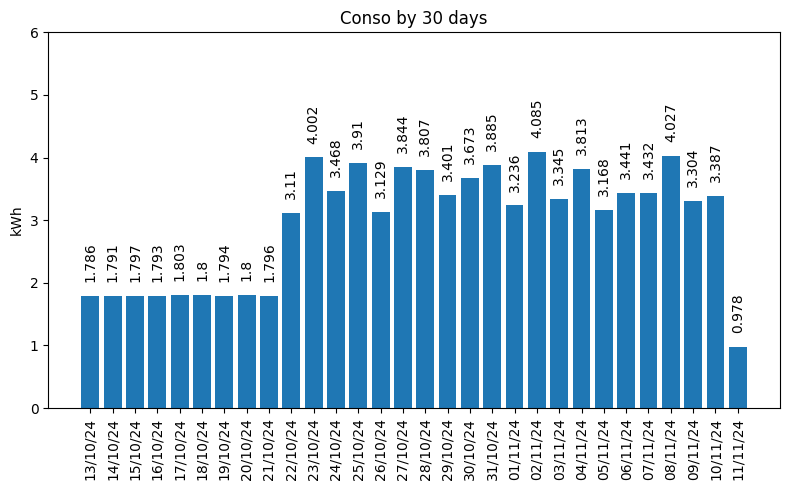

In [974]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [975]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

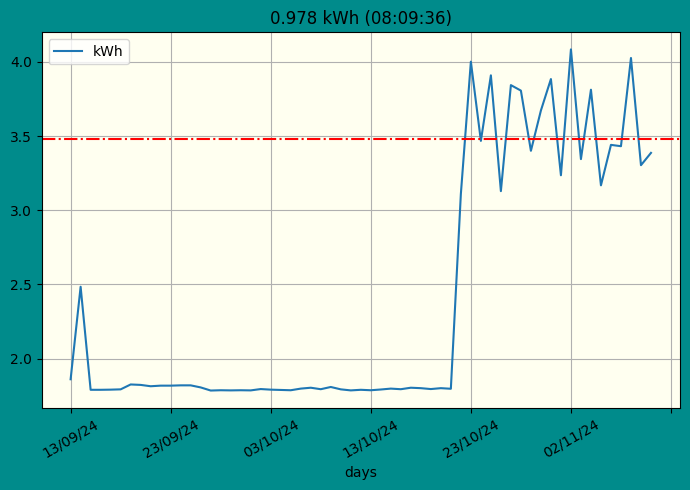

In [976]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

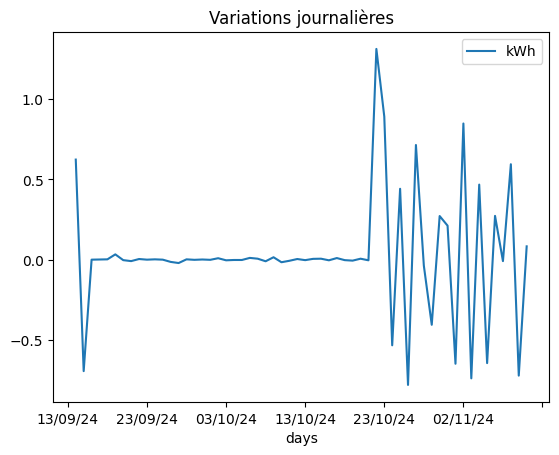

In [977]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [978]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:52:17.943322,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:52:39.801322,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:53:01.802322,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:53:23.730322,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:53:45.621322,21/08/23,18
...,...,...,...,...,...,...,...,...
1561554,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24,08
1561555,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24,08
1561556,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24,08
1561557,16786,0.21,16.786,214.464435,38668612513,2024-11-11 08:08:48.522322,11/11/24,08


In [979]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [980]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [981]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [982]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [983]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,861
22/08/23,3700
23/08/23,4230
24/08/23,3686
25/08/23,4195
...,...
07/11/24,3432
08/11/24,4027
09/11/24,3304


In [984]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:52:17.943322,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:52:39.801322,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:53:01.802322,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:53:23.730322,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:53:45.621322,21/08/23,18
...,...,...,...,...,...,...,...,...
1561554,16516,0.22,16.516,217.970453,38668562398,2024-11-11 08:07:58.407322,11/11/24,08
1561555,16557,0.22,16.557,217.430694,38668578955,2024-11-11 08:08:14.964322,11/11/24,08
1561556,16772,0.21,16.772,214.643453,38668595727,2024-11-11 08:08:31.736322,11/11/24,08
1561557,16786,0.21,16.786,214.464435,38668612513,2024-11-11 08:08:48.522322,11/11/24,08


In [985]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
11/11/24 08    1561554  11/11/24    08  0.22
               1561555  11/11/24    08  0.22
               1561556  11/11/24    08  0.21
               1561557  11/11/24    08  0.21
               1561558  11/11/24    08  0.21

[1561559 rows x 3 columns]

In [986]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [987]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [988]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,861,861
22/08/23,3700,3700
23/08/23,4230,4230
24/08/23,3686,3686
25/08/23,4195,4195
...,...,...
07/11/24,3432,3432
08/11/24,4027,4027
09/11/24,3304,3304


In [989]:
grp_by_day['kWh'].cumsum()

days
21/08/23        861
22/08/23       4561
23/08/23       8791
24/08/23      12477
25/08/23      16672
             ...   
07/11/24    1549863
08/11/24    1553890
09/11/24    1557194
10/11/24    1560581
11/11/24    1561559
Name: kWh, Length: 449, dtype: int64

In [990]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      22
         19     226
         20     223
         21     130
         22     130
...             ...
11/11/24 04     106
         05     112
         06     113
         07     176
         08      30

[10743 rows x 1 columns]

In [991]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            22
          19           248
          20           471
          21           601
          22           731
                    ...   
11/11/24  04       1561128
          05       1561240
          06       1561353
          07       1561529
          08       1561559
Name: kWh, Length: 10743, dtype: int64

In [992]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      22      22    NaN
         19     226     248  204.0
         20     223     471   -3.0
         21     130     601  -93.0
         22     130     731    0.0
...             ...     ...    ...
11/11/24 04     106     547   -4.0
         05     112     659    6.0
         06     113     772    1.0
         07     176     948   63.0
         08      30     978 -146.0

[10743 rows x 3 columns]

In [993]:
today, grp_by_dayhours.loc[today]

('11/11/24',
        kWh  cumsum   diff
 hours                    
 00     105     105    NaN
 01     113     218    8.0
 02     113     331    0.0
 03     110     441   -3.0
 04     106     547   -4.0
 05     112     659    6.0
 06     113     772    1.0
 07     176     948   63.0
 08      30     978 -146.0)

Text(0.5, 1.0, 'Cumul journalier')

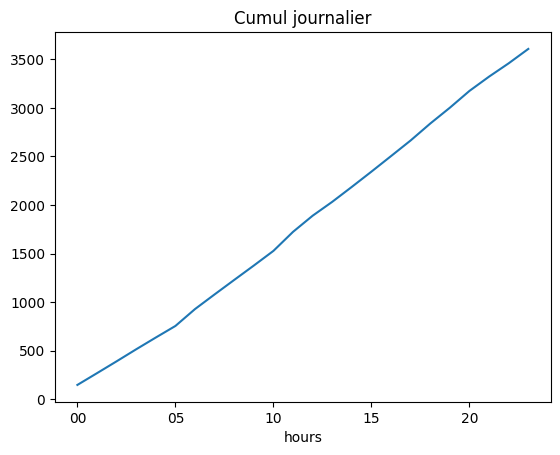

In [994]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

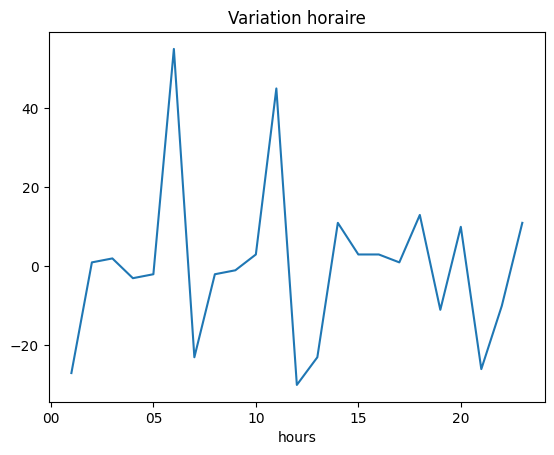

In [995]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [996]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

449

In [997]:
df_grp.tail(n)['kWh'].describe()


count    449.000000
mean       3.477860
std        0.719634
min        0.861000
25%        3.336000
50%        3.610000
75%        3.881000
max        5.134000
Name: kWh, dtype: float64

In [998]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '449 days')

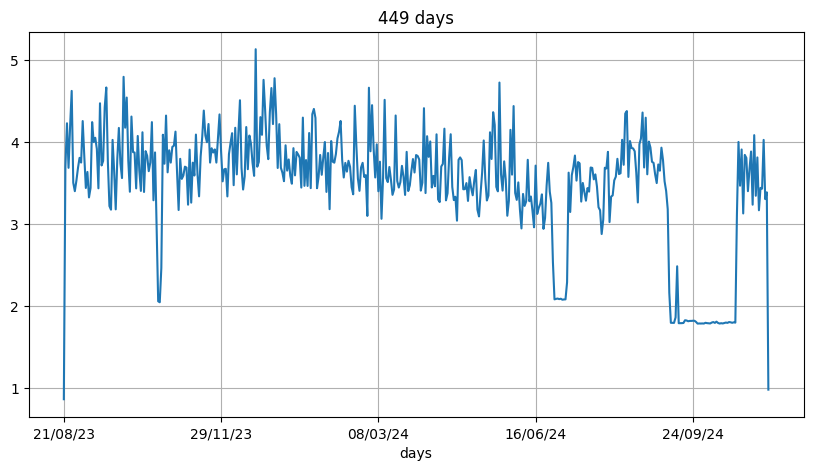

In [999]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

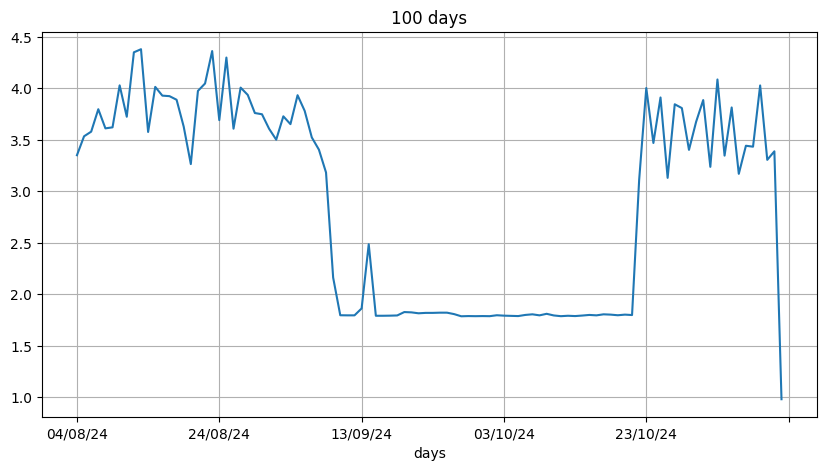

In [1000]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1001]:
df_grp['kWh']

days
21/08/23    0.861
22/08/23    3.700
23/08/23    4.230
24/08/23    3.686
25/08/23    4.195
            ...  
07/11/24    3.432
08/11/24    4.027
09/11/24    3.304
10/11/24    3.387
11/11/24    0.978
Name: kWh, Length: 449, dtype: float64

In [1002]:
df_grp.describe()

,kWh
count,449.000000
mean,3.477860
std,0.719634
min,0.861000
25%,3.336000
50%,3.610000
75%,3.881000
max,5.134000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

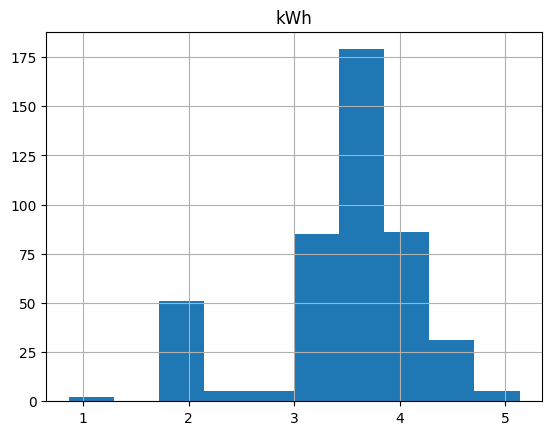

In [1003]:
# 
df_grp.hist()

In [1004]:
df_grp.tail(span)['kWh']

days
04/08/24    3.349
05/08/24    3.533
06/08/24    3.578
07/08/24    3.796
08/08/24    3.610
            ...  
07/11/24    3.432
08/11/24    4.027
09/11/24    3.304
10/11/24    3.387
11/11/24    0.978
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1005]:
day

'11/11/24'

In [1006]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,105,105,NaN
01,113,218,8.0
02,113,331,0.0
03,110,441,-3.0
04,106,547,-4.0
05,112,659,6.0
06,113,772,1.0
07,176,948,63.0
08,30,978,-146.0


In [1007]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


9

In [1008]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 10)

In [1009]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1010]:
grp_by_dayhours.loc[day,'days'].values

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [1011]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
08    9.0
Name: days, dtype: float64

In [1012]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1013]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 00 to 08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     9 non-null      int64  
 1   cumsum  9 non-null      int64  
 2   diff    8 non-null      float64
 3   days    9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 360.0+ bytes


In [1014]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
08    9.0
Name: days, dtype: float64

In [1015]:
day

'11/11/24'

In [1016]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,105,105,NaN,1.0
01,113,218,8.0,2.0
02,113,331,0.0,3.0
03,110,441,-3.0,4.0
04,106,547,-4.0,5.0
05,112,659,6.0,6.0
06,113,772,1.0,7.0
07,176,948,63.0,8.0
08,30,978,-146.0,9.0


Text(0.5, 1.0, '11/11/24')

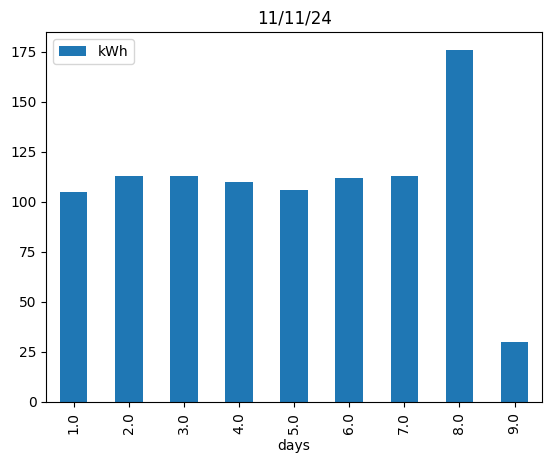

In [1017]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1018]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08'], dtype='object', name='hours')

# Conso du jour


In [1019]:
groupedbyhour.count()

,kWh
hours,
00,105
01,113
02,113
03,110
04,106
05,112
06,113
07,176
08,30


In [1020]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    168
01    163
02    156
03    167
04    144
05    131
06    130
07    115
08    130
09    116
10    129
11    130
12    175
13    157
14    151
15    643
16    487
17    254
18    308
19    283
20    319
21    317
22    191
23    170
Name: kWh, dtype: int64

In [1037]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# Today

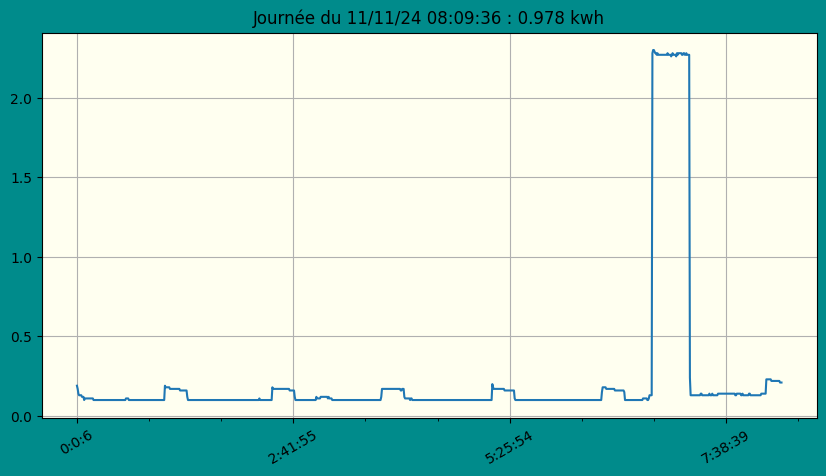

In [1038]:
show(today,bgcolor='ivory')

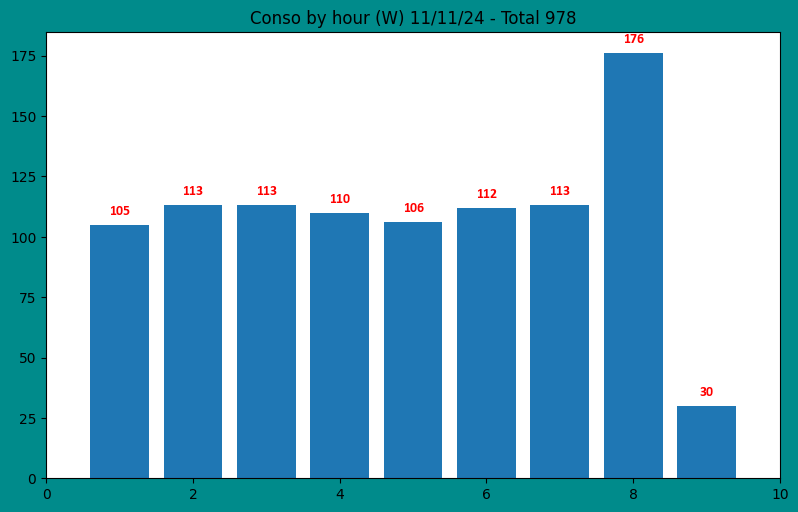

In [1039]:
conso_by_hour(today)

('21/12/23', None)

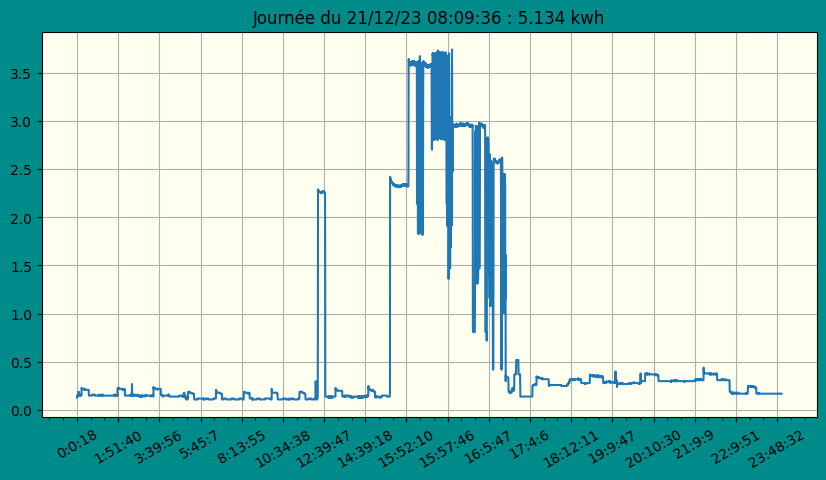

In [1040]:
day, show(day,bgcolor='ivory')

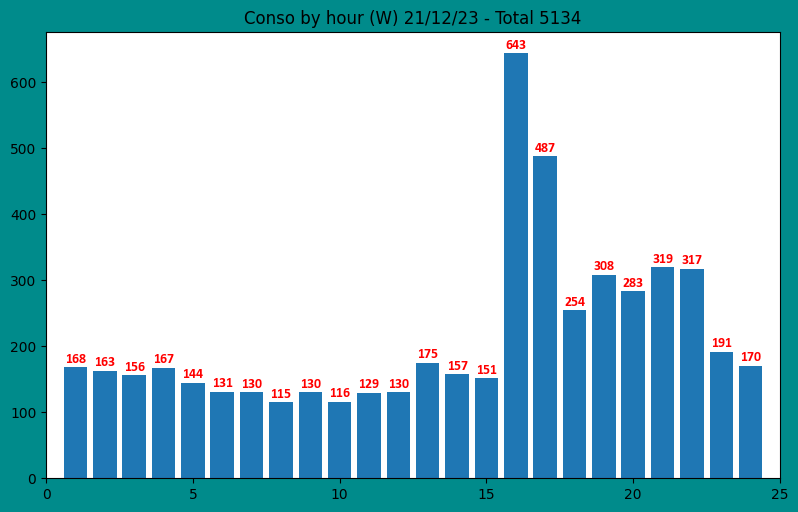

In [1041]:
conso_by_hour(day)

('21/12/23', None)

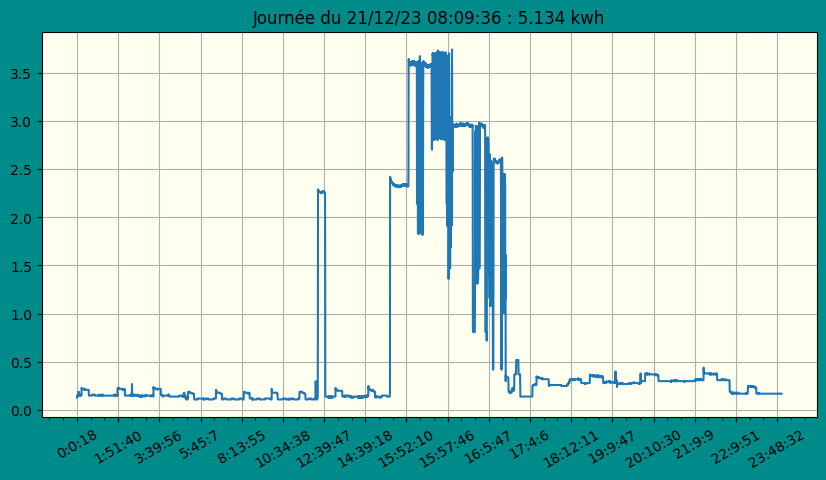

In [1042]:
# retour vietnam 22/10/2024
day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

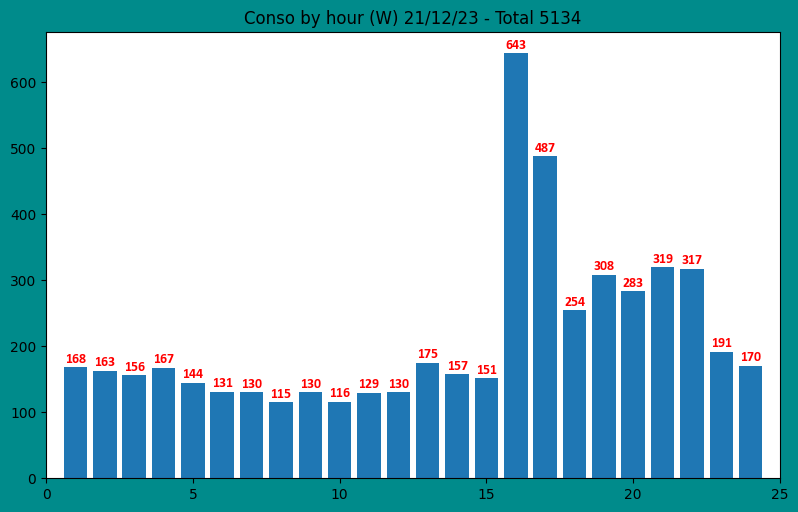

In [1043]:
conso_by_hour(day)

In [1044]:
sum(data)

5134

In [1045]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,105,105,NaN,1.0
01,113,218,8.0,2.0
02,113,331,0.0,3.0
03,110,441,-3.0,4.0
04,106,547,-4.0,5.0
05,112,659,6.0,6.0
06,113,772,1.0,7.0
07,176,948,63.0,8.0
08,30,978,-146.0,9.0


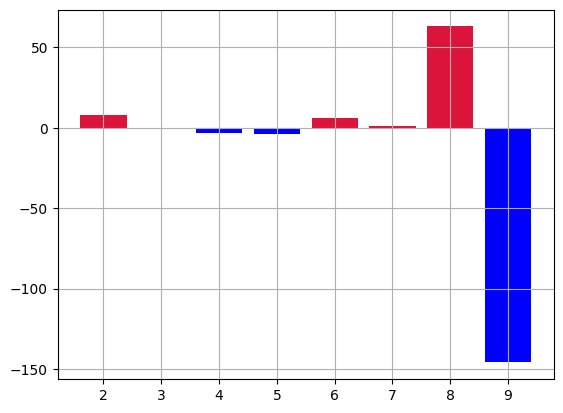

In [1046]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1047]:
data

hours
00    168
01    163
02    156
03    167
04    144
05    131
06    130
07    115
08    130
09    116
10    129
11    130
12    175
13    157
14    151
15    643
16    487
17    254
18    308
19    283
20    319
21    317
22    191
23    170
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

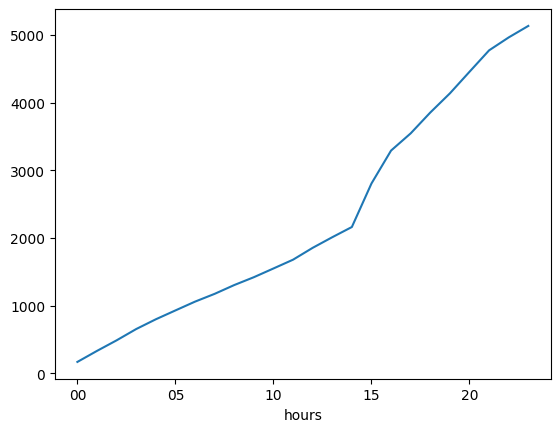

In [1048]:
data.cumsum().plot()


<Axes: xlabel='hours'>

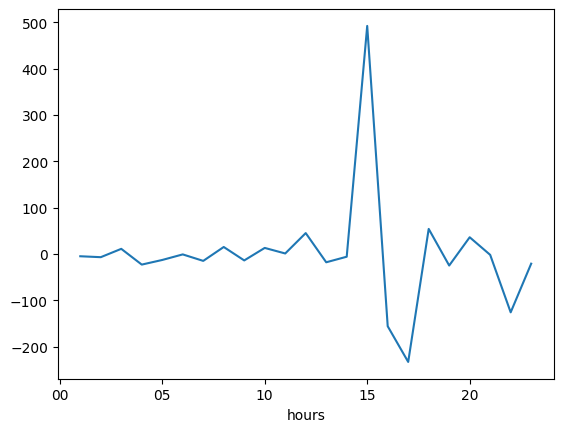

In [1049]:
# evolution par heure
data.diff().plot()

In [1050]:
data.diff().describe()

count     23.000000
mean       0.086957
std      125.397881
min     -233.000000
25%      -19.500000
50%       -6.000000
75%       12.000000
max      492.000000
Name: kWh, dtype: float64

<Axes: >

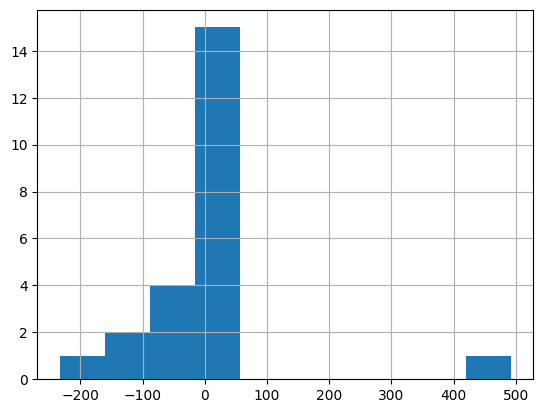

In [1051]:
data.diff().hist()

# Test sauvegarde

In [1052]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1053]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1054]:
#conso_byhour(day)

In [1055]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


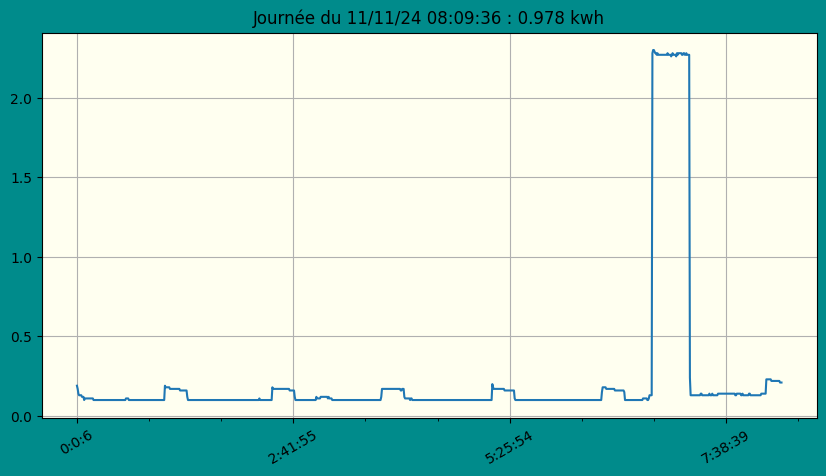

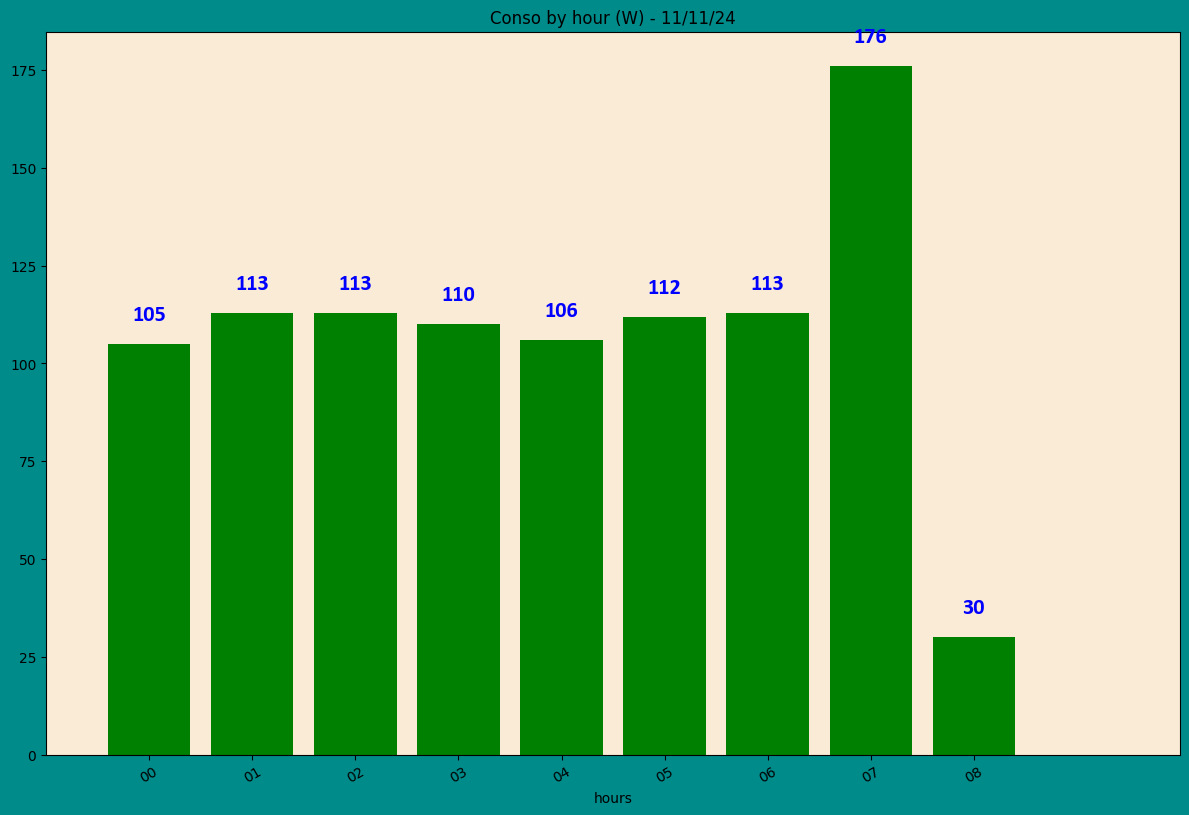

In [1056]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1057]:
month.describe()


count    30.000000
mean      2.980533
std       0.891939
min       1.786000
25%       1.800000
50%       3.324500
75%       3.773500
max       4.085000
Name: kWh, dtype: float64

<Axes: >

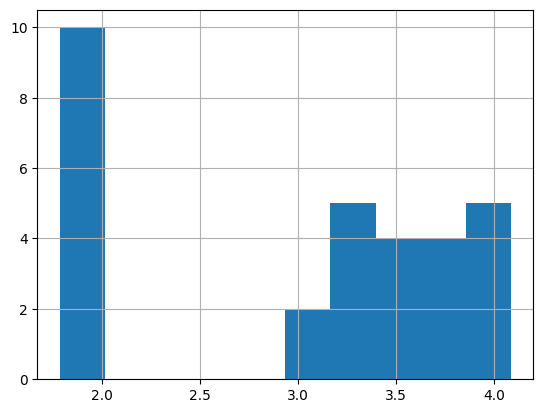

In [1058]:
month.hist()

<Axes: xlabel='days'>

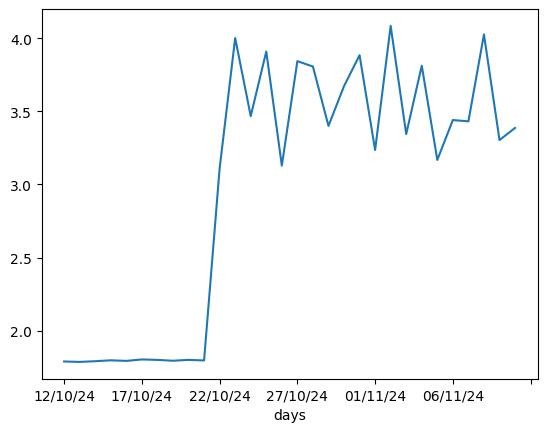

In [1059]:
month.plot()

In [1060]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [1061]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

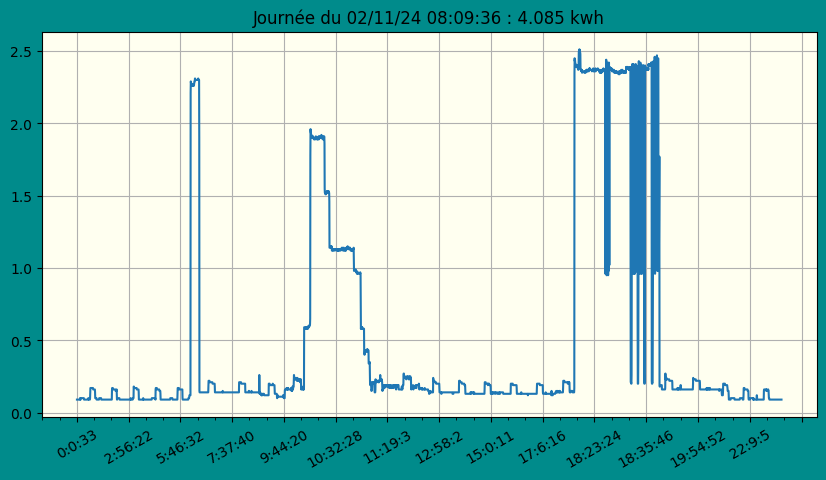

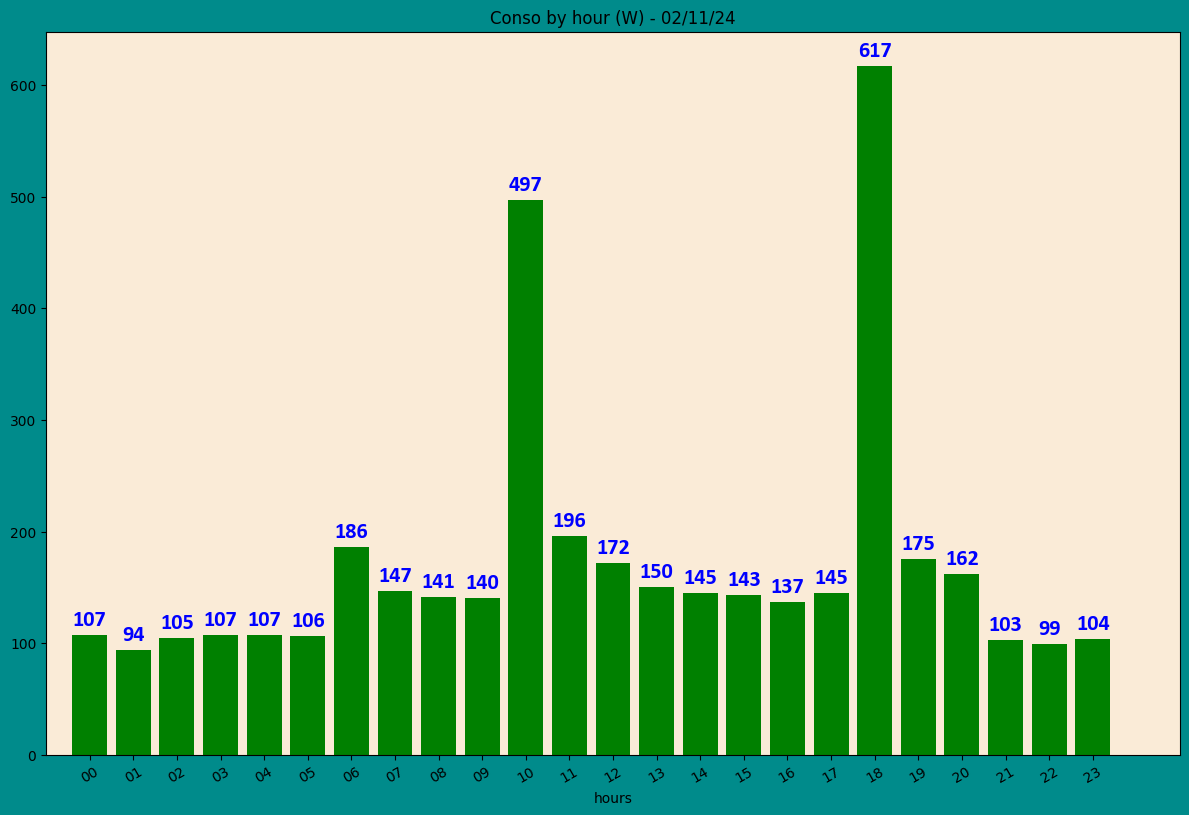

In [1062]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1063]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 18      22      22    NaN   NaN
         19     226     248  204.0   NaN
         20     223     471   -3.0   NaN
         21     130     601  -93.0   NaN
         22     130     731    0.0   NaN
...             ...     ...    ...   ...
11/11/24 04     106     547   -4.0   5.0
         05     112     659    6.0   6.0
         06     113     772    1.0   7.0
         07     176     948   63.0   8.0
         08      30     978 -146.0   9.0

[10743 rows x 4 columns]

In [1064]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,107,107,NaN,NaN
01,94,201,-13.0,NaN
02,105,306,11.0,NaN
03,107,413,2.0,NaN
04,107,520,0.0,NaN
05,106,626,-1.0,NaN
06,186,812,80.0,NaN
07,147,959,-39.0,NaN
08,141,1100,-6.0,NaN


In [1065]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

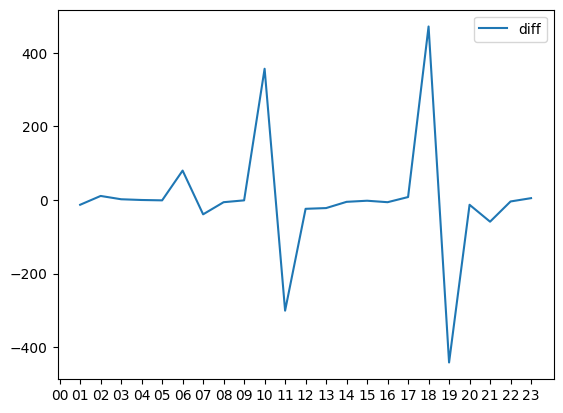

In [1066]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

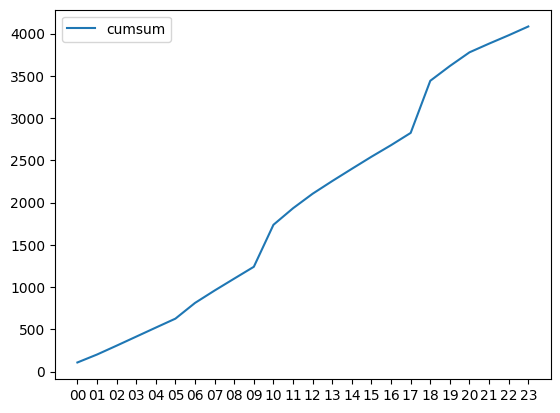

In [1067]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1068]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB